In [2]:
import numpy as np
import quaternion
import math
from numpy import linalg as LA


x0 = [1, 0, 0]
y0 = [0, 1, 0]
z0 = [0, 0, 1]

x0_quat = quaternion.quaternion(0,1,0,0)
y0_quat = quaternion.quaternion(0,0,1,0)
z0_quat = quaternion.quaternion(0,0,0,1)

def get_new_frame(vect,angle=0):

    beta = angle*math.pi/180


    ### GOAL VECTOR (the desired Z axis)###
    goal = vect


    goal_norm = []
    for i in goal:
        goal_norm.append(i/LA.norm(goal)) #Normalized vector of goal

    ### VECTOR AND ANGLE OF ROTATION ###
    vector= np.cross(z0,goal_norm)

    vector_norm = [] #Normalized vector of rotation
    for i in vector:
        vector_norm.append(i/LA.norm(vector))

    alpha = math.acos(np.vdot(z0,goal_norm)) #Angle of rotation

    if alpha == 0 :
        v = quaternion.quaternion(0.0,0.0,0.0,1.0)

    else :  
        v = quaternion.quaternion(0.0,vector_norm[0],vector_norm[1],vector_norm[2]) #Vector of rotation as a quaternion





    ### QUATERNION OF ROTATION ###
    w1 = math.cos(alpha/2.0)
    x1 = math.sin(alpha/2.0)*v.x
    y1 = math.sin(alpha/2.0)*v.y
    z1 = math.sin(alpha/2.0)*v.z

    q1 = quaternion.quaternion(w1,x1,y1,z1) #1st rotation quaternion
    q1_inv = q1.inverse()

    z_prime = q1*z0_quat*q1_inv

    w2 = math.cos(beta/2.0)
    x2 = math.sin(beta/2.0)*z_prime.x
    y2 = math.sin(beta/2.0)*z_prime.y
    z2 = math.sin(beta/2.0)*z_prime.z

    q2 = quaternion.quaternion(w2,x2,y2,z2) #Quaternion of the rotation on new z axis
    q2_inv = q2.inverse()

    new_z = q2*z_prime*q2_inv #Final Z
    new_x = q2*(q1*x0_quat*q1_inv)*q2_inv #Final X
    new_y = q2*(q1*y0_quat*q1_inv)*q2_inv #Final Y

    X = [new_x.x, new_x.y, new_x.z]
    Y = [new_y.x, new_y.y, new_y.z]
    Z = [new_z.x, new_z.y, new_z.z]

    return X,Y,Z

/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [70]:
from math import *

Pc = [0,0,83.40]   #Coordinates of the plateform's center
C = [0,0,64.64]   #Coordinates of the center of the proximal circle
R = 37.528   #Radius of the distal circle
Rp = R*cos(30.0*pi/180)   #Radius of the proximal center

eq = [[],[],[]]

beta = 0
goal = [0.0,0.0,1.0]

### Find q31 and q11 ###
X,Y,Z = get_new_frame(goal,beta)
q31_ = [2*atan((R*X[2] - sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2])), 2*atan((R*X[2] + sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2]))]
#for i in range(len(q31_)):
#    q31_[i]=q31_[i]

if 0<=q31_[0]<=180:
    q31 = q31_[0]
else :
    q31= q31_[1]
print(q31*180/pi)
q11 = atan((Z[1]*cos(q31)+X[1]*sin(q31))/(Z[0]*cos(q31)+X[0]*sin(q31))) 
#q11 = [[-acos(R*(X[0]*sin(q31) + Z[0]*cos(q31))/Rp)], [acos(R*(X[0]*sin(q31) + Z[0]*cos(q31))/Rp)]]

#for i in range(len(q11)):
#    for j in range(len(q11[i])):
#        q11[i][j]=q11[i][j]*180/pi

print("q11 TOP: ",q11*180/pi)

### Find q32 and q12 ###
X,Y,Z = get_new_frame(goal,beta+120)
q32_ = [2*atan((R*X[2] - sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2])), 2*atan((R*X[2] + sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2]))]
#for i in range(len(q31_)):
#    q31_[i]=q31_[i]

if 0<=q32_[0]<=180:
    q32 = q32_[0]
else :
    q32= q32_[1]
print(q32*180/pi)
q12 = atan2((Z[1]*cos(q32)+X[1]*sin(q32)),(Z[0]*cos(q32)+X[0]*sin(q32))) 
#q11 = [[-acos(R*(X[0]*sin(q31) + Z[0]*cos(q31))/Rp)], [acos(R*(X[0]*sin(q31) + Z[0]*cos(q31))/Rp)]]

#for i in range(len(q11)):
#    for j in range(len(q11[i])):
#        q11[i][j]=q11[i][j]*180/pi

print("q12 MIDDLE: ",(q12*180/pi)-120)

### Find q33 and q13 ###
X,Y,Z = get_new_frame(goal,beta-120)
q33_ = [2*atan((R*X[2] - sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2])), 2*atan((R*X[2] + sqrt(R**2*X[2]**2 + R**2*Z[2]**2 - C[2]**2 + 2*C[2]*Pc[2] - Pc[2]**2))/(R*Z[2] + C[2] - Pc[2]))]
#for i in range(len(q31_)):
#    q31_[i]=q31_[i]

if 0<=q33_[0]<=180:
    q33 = q33_[0]
else :
    q33= q33_[1]
print(q33*180/pi)
q13 = atan2((Z[1]*cos(q33)+X[1]*sin(q33)),(Z[0]*cos(q33)+X[0]*sin(q33))) 
#q13 = [[-acos(R*(X[0]*sin(q33) + Z[0]*cos(q33))/Rp)], [acos(R*(X[0]*sin(q33) + Z[0]*cos(q33))/Rp)]]

#for i in range(len(q13)):
#    for j in range(len(q13[i])):
#        q13[i][j]=q13[i][j]*180/pi

print("q13 BOTTOM: ",(q13*180/pi)+120)




119.99294850594724
q11 TOP:  0.0
119.99294850594724
q12 MIDDLE:  -1.4210854715202004e-14
119.99294850594724
q13 BOTTOM:  1.4210854715202004e-14


/Users/augustin/.virtualenvs/spherical-joint/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


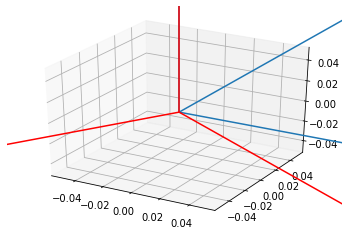

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



origin = [0,0,0]
X_, Y_, Z_ = zip(origin,origin,origin)
X0_,Y0_,Z0_ = zip(origin,origin,origin)
U, V, W = zip(X,Y,Z)
U0,V0,W0 = zip(x0,y0,z0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.quiver(X0_,Y0_,Z0_,U0,V0,W0,arrow_length_ratio=0.01)
ax.quiver(X_,Y_,Z_,U,V,W,arrow_length_ratio=0.01,color='r')
plt.show()